# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
def throw_dice(n):
    return pd.DataFrame(np.array([random.choice(np.arange(1,7,1)) for i in range(n)]))

#### 2.- Plot the results sorted by value.

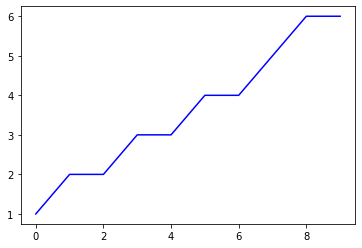

In [8]:
# your code here
dice = throw_dice(10).sort_values(by=0).reset_index()[0]
plt.plot(range(len(dice)), dice, color = "blue")
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([1., 2., 2., 2., 1., 2.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

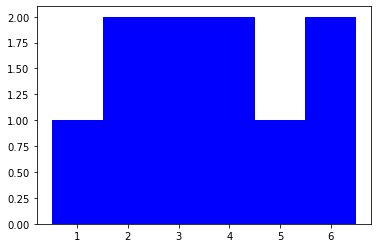

In [15]:
# your code here
plt.hist(dice, bins=6, range=(0.5,6.5),color = "blue")

In [ ]:
"""
your comments here
The x axis shows the number of the dice [1,6]
and the y axis shows the occurence of that number (repetitions)
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
# your code here
def avg(data):
    return sum(data)/len(data)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [19]:
# your code here
def freq(vals):
   
    freq_dist = {}
    for x in vals:
        if x in freq_dist:
            freq_dist[x] += 1
        else:
            freq_dist[x] = 1
            
    return freq_dist, sum([k*v for k, v in freq_dist.items()])/sum([v for k, v in freq_dist.items()])

freq_dist, mean_from_freq = freq(dice)

print(mean_from_freq)
print(np.mean(dice))

3.6
3.6


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [20]:
# your code here
def median(val):
    
    """
    Input: list of values
    Ouput: median value of input list
    """
    
    if len(val) % 2 == 0:
        return sum(val[int(len(val)/2)-1:int(len(val)/2)+1])/2
    
    else:
        return val[int(len(val)/2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [21]:
# your code here

#source stack overflow of this function

def quartiles(vals):
    
    half = median(vals)
    
    if len(vals) % 2 == 0:
        first_quartile = median(vals[:int(len(vals)/2)])
        third_quartile = median(vals[int(len(vals)/2):])
    
    else:
        first_quartile = median(vals[:int(len(vals)/2)-1])
        third_quartile = median(vals[int(len(vals)/2)+1:])
    
    return first_quartile, half, third_quartile

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

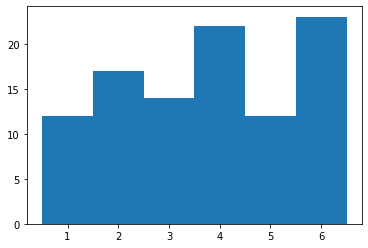

In [24]:
# your code here

dice_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_values = sorted(dice_df['value'])
plt.hist(dice_values, bins=6, range= (0.5, 6.5))
plt.show()

In [25]:
"""
your comments here
I see the distribution , o number of throws and by each result 
"""

'\nyour comments here\nI see the distribution , o number of throws and by each result \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [26]:
# your code here
print(avg(dice_values))
print(quartiles(dice_values))

3.74
(2.0, 4.0, 5.0)


#### 3.- Now, calculate the frequency distribution.


In [28]:
# your code here
freq_dist = freq(dice_values)
print(freq_dist)

({1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}, 3.74)


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

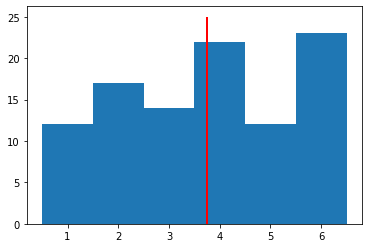

In [31]:
# your code here
plt.hist(dice_values, bins=6, range= (0.5, 6.5))
#graph to identifie the mean line ( put a vertical line of the mean of the dataframe)
plt.vlines(dice_df['value'].mean(), ymin=0, ymax=25, lw=2, color= "Red")

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

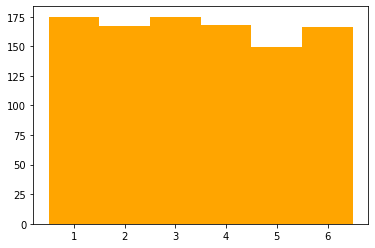

In [34]:
# your code here
thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
plt.hist(thousand['value'], bins= 6, range= (0.5, 6.5),color = "orange")
plt.show()

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

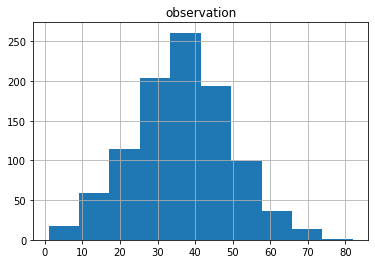

In [36]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.hist()
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [37]:
# your code here
print(ages.observation.mean())
print(ages.observation.std())

36.56
12.816499625976762


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

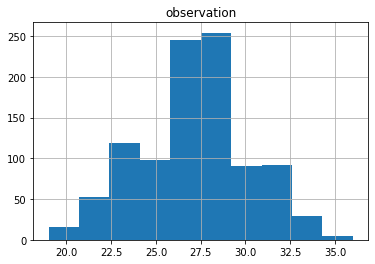

In [39]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.hist()
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [40]:
# your code here
print(ages2.observation.mean())
print(ages2.observation.std())

27.155
2.969813932689186


In [41]:
print(quartiles(ages2.observation.sort_values()))
ages2.describe()

(25.0, 27.0, 29.0)


,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

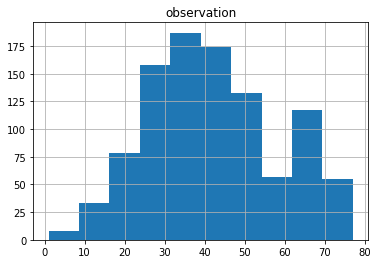

In [43]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [44]:
# your code here
print(ages3.observation.mean())
print(ages3.observation.std())

41.989
16.144705959865934


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [47]:
# your code here
print(ages3.observation.quantile(.25))
print(ages3.observation.quantile(.5))
print(ages3.observation.quantile(.75))
print(ages3.observation.quantile(1))

30.0
40.0
53.0
77.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""